## Maximum PH85 topology distance between pairs of virus-host trees

In this example we show that randomising the tips a few times is sufficient to obtain the maximum tree topology distance between a pair of trees using R. First load NELSI and set the size of the plots for the Jupyter notebook

In [122]:
library(NELSI)
options(repr.plot.width = 7, repr.plot.height = 4)

Load the *Hepadnaviridae* trees in this repository. Note t that the virus and host trees have the same taxon names, which correspond to those of the host species.

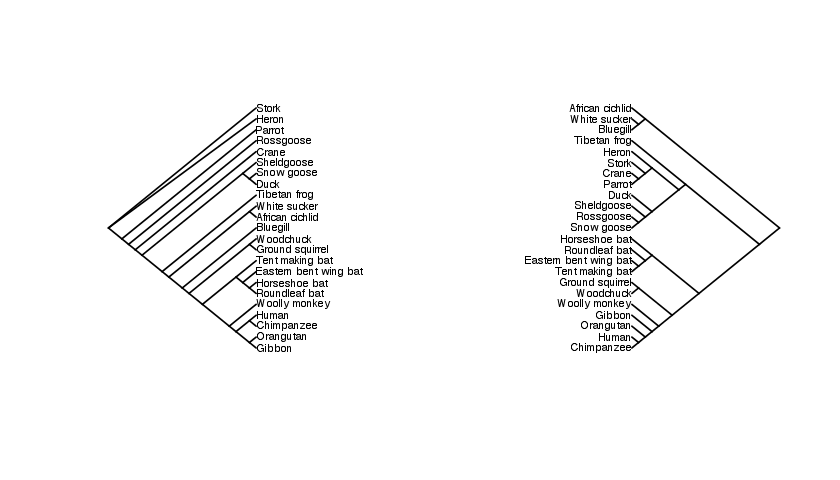

In [145]:
hepadna_virus <- read.nexus('Hepadnaviridae_trimal.phy_phyml.tree')
hepadna_host <- read.nexus('Hepadnaviridae_host.tree')

par(mfrow = c(1, 2))
plot(ladderize(hepadna_virus), 'cladogram', cex = 0.5, use.edge.length = F)
plot(ladderize(hepadna_host), direction = 'leftwards', 'cladogram', cex = 0.5, use.edge.length = F)

**Fig 1.** Hepadnaviridae host (right) and virus (left) trees.


Define a funciton which randomises the tip labels for one of the trees, calculates the distanace each time, and reports the maximum value:

In [158]:
nrand <- 100
max_dist <- function(tr1, tr2, nrand){
    ds <- vector()
    for(i in 1:nrand){
        tr1_r <- tr1
        tr1_r$tip.label <- sample(tr1$tip.label)
        ds[i] <- dist.topo(tr1_r, tr2)
    }
    return(max(ds))
}

Conduct a set of randomisations to obtain the maximum distance for the trees:

In [159]:
d_nrand <- sapply(1:nrand, function(x) max_dist(hepadna_host, hepadna_virus, x))

Repeat the same procedure for the *Parvoviridae*:

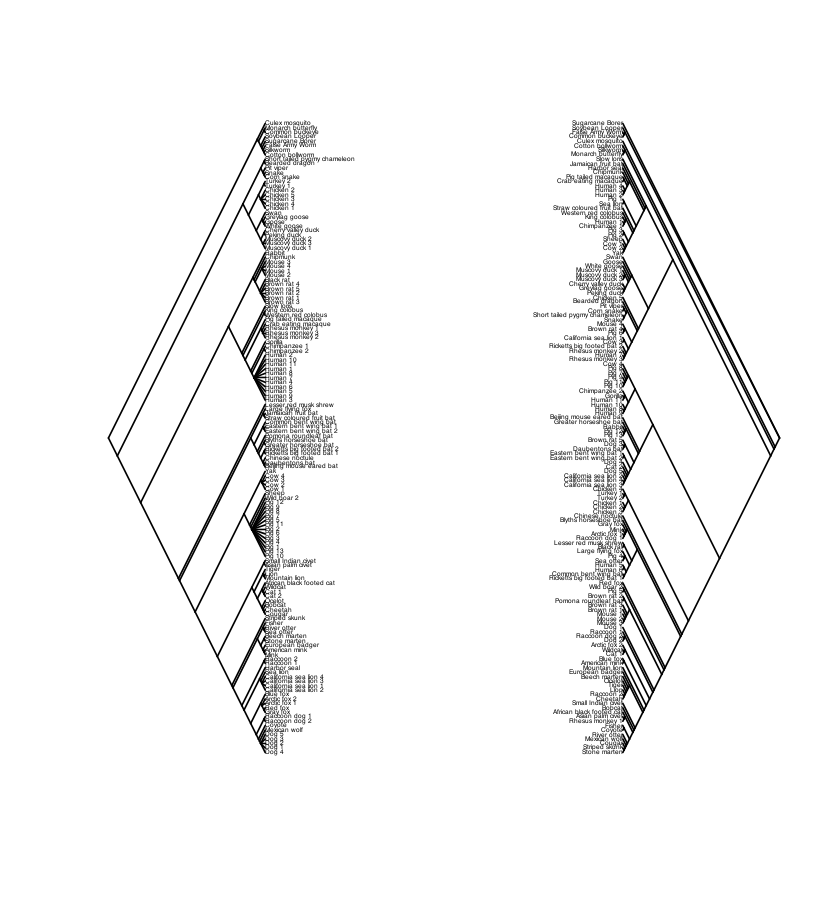

In [160]:
parvo_host <- read.nexus('Parvoviridae_host.tree')
parvo_virus <- read.nexus('Parvoviridae_trimal.phy_phyml.tree')

options(repr.plot.width = 7, repr.plot.height = 7.5)
par(mfrow = c(1, 2))
plot(ladderize(parvo_host), 'cladogram', use.edge.length = F, cex = 0.3)
plot(ladderize(parvo_virus), 'cladogram', use.edge.length = F, cex = 0.3, direction = 'leftwards')

**Fig 2.** Parvoviridae host (right) and virus trees (left).

In [161]:
d_nrand_parvo <- sapply(1:nrand, function(x) max_dist(parvo_host, parvo_virus, x))

To plot the results we plot the number of randomisations along the *x* axis and the actual distance along *y*. For comparison, we also show the tree distance without randomising, which sholud be lower or equal to than that of the randomisations. 

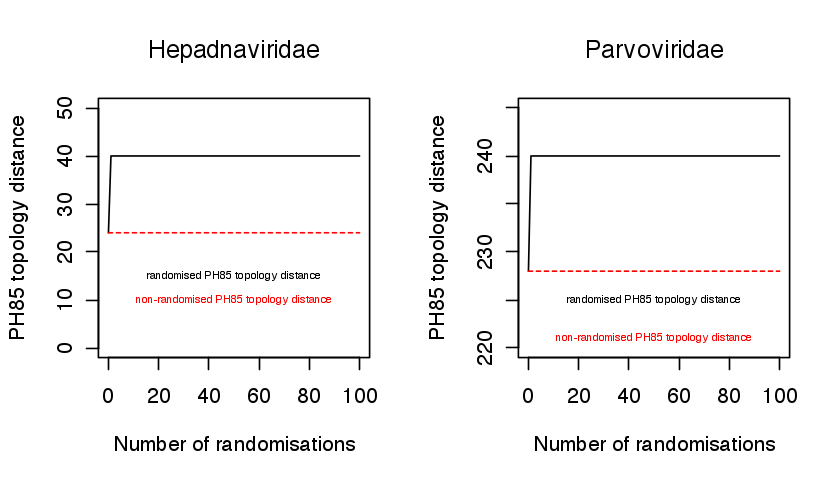

In [179]:
options(repr.plot.width = 7, repr.plot.height = 4)
par(mfrow = c(1, 2))

plot(0:100, c(dist.topo(hepadna_host, hepadna_virus), d_nrand), type = 'l', ylim = c(0, 50),
    ylab = 'PH85 topology distance', xlab = 'Number of randomisations',
    main = 'Hepadnaviridae')
lines(0:100, rep(dist.topo(hepadna_host, hepadna_virus), 101), col = 'red', lty = 2)
text(x = 50, y = 10, 'non-randomised PH85 topology distance', col = 'red', cex = 0.5)
text(x = 50, y = 15, 'randomised PH85 topology distance', cex = 0.5)

plot(0:100, c(dist.topo(parvo_host, parvo_virus), d_nrand_parvo), type = 'l', ylim = c(220, 245),
    ylab = 'PH85 topology distance', xlab = 'Number of randomisations',
    main = 'Parvoviridae')
lines(0:100, rep(dist.topo(parvo_host, parvo_virus), 101), col = 'red', lty = 2)
text(x = 50, y = 221, 'non-randomised PH85 topology distance', col = 'red', cex = 0.5)
text(x = 50, y = 225, 'randomised PH85 topology distance', cex = 0.5)

**Fig 3.** Topological distance for 0 to 100 randomisations.